<a href="https://colab.research.google.com/github/Samdersson/Percetron_Simple/blob/main/Red_Unidireccional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 1: Importar las bibliotecas

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Paso 2: cargar el conjunto de datos MNIST

In [ ]:
import tensorflow as tf # Make sure to import the tensorflow module
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Normalizar valores de pixeles entre 0 y 1

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Paso 3: Construir el modelo unidireccional (Feedfroward)

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en vectores de 784 elementos
    layers.Dense(128, activation='relu'),  # Capa densa con 128 neuronas y función de activación ReLU
    layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por dígito), usando softmax
])

# Paso 4 : compilar

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Paso 5 Entrenar Modelo

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2632 - accuracy: 0.9247 - val_loss: 0.1429 - val_accuracy: 0.9577
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1139 - accuracy: 0.9671 - val_loss: 0.1041 - val_accuracy: 0.9692
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0778 - accuracy: 0.9762 - val_loss: 0.0949 - val_accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 0.0780 - val_accuracy: 0.9754
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0460 - accuracy: 0.9857 - val_loss: 0.0788 - val_accuracy: 0.9770


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nPrecisión en el conjunto de prueba: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0788 - accuracy: 0.9770

Precisión en el conjunto de prueba: 0.9769999980926514


# visualizar

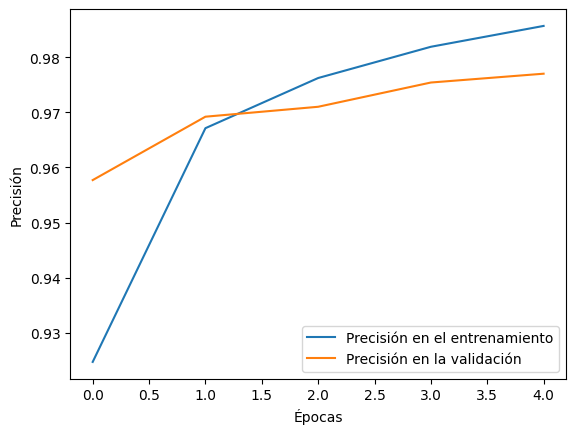

In [ ]:
plt.plot(history.history['accuracy'], label='Precisión en el entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en la validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()